/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Original Text: colorful dishes holding meat, vegetables, fruit, and bread.
Processed Text: colorful dishes holding meat vegetables fruit bread
['colorful dish holding meat vegetable fruit bread']


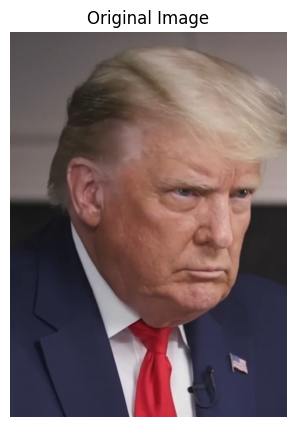

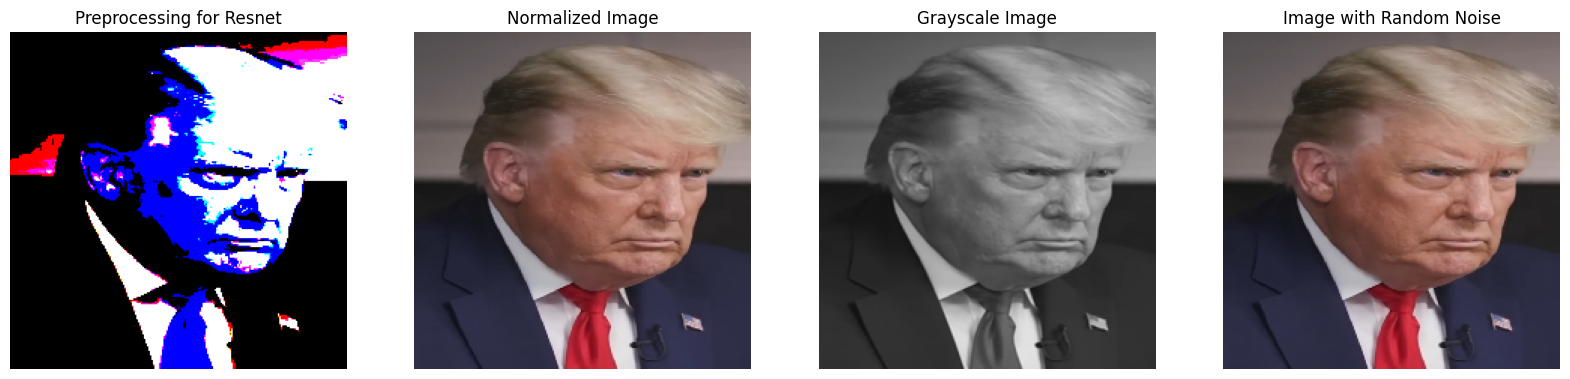

In [1]:
import torch
from torchvision import transforms
from PIL import Image
from transformers import BertTokenizer
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
import tensorflow as tf
import numpy as np
import re
import nltk

# Define the BERT tokenizer
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    img_array = preprocess_input(img_array)
    return img_array


def normalize_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array

def grayscale_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert image to grayscale
    img = img.resize((224, 224))  # Resize to (224, 224)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
    img_array = np.concatenate([img_array, img_array, img_array], axis=-1)  # Convert to 3-channel grayscale
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array

def add_random_noise(image_path, noise_factor=0.1):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    noise = np.random.normal(loc=0.0, scale=1.0, size=img_array.shape)
    noisy_img = img_array + noise_factor * noise
    noisy_img = np.clip(noisy_img, 0., 255.) / 255.
    return noisy_img

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# function used to remove unwanted text patterns
def remove_pattern(input_text, pattern):
    r = re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text

text = 'colorful dishes holding meat, vegetables, fruit, and bread.'
print("Original Text:", text)
processed_text = np.vectorize(remove_pattern)(text, "@[\w]*") #removing special characters(except #)

# Convert the numpy array to a string
processed_text_str = ' '.join(processed_text.flatten().tolist())

# Remove unwanted text patterns
processed_text_str = re.sub("@[\w]*", "", processed_text_str)  # removing special characters (except #)
processed_text_str = re.sub("[^a-zA-Z#]", " ", processed_text_str)  # removing everything except alphabets and #
processed_text_str = re.sub(r'http\S+', " ", processed_text_str)  # removing links
processed_text_str = ' '.join([w for w in processed_text_str.split() if len(w) > 3])  # removing words of shorter length

# Print the processed text
print("Processed Text:", processed_text_str)

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

dataList = []
lemma = WordNetLemmatizer()

# Example input strings
input_string = processed_text_str
data = input_string

#for data in input_strings:
data = data.lower()
data = nltk.word_tokenize(data)
#removal of stop-words(here stopwords.words('english') contains a set of frequently appearing stop words.
stop_words = set(stopwords.words('english'))
data = [w for w in data if not w in stop_words]
data = [lemma.lemmatize(word) for word in data] #Lemmatizing(removing inflectional endings and returning the base forms of words)
data = " ".join(data)
dataList.append(data)
dataArray = np.asarray(dataList) # Converting the list to numpy array
print(dataArray)
# Example usage
image_path = "/content/trump_deepfake.jpeg"

# Load and display the original image
original_image = Image.open(image_path)
plt.figure(figsize=(5, 5))
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Append the preprocessed image to the list
preprocessed_images = [
    preprocess_image(image_path),
    normalize_image(image_path),
    grayscale_image(image_path),
    add_random_noise(image_path)
]

# Display preprocessed images
fig, axes = plt.subplots(1, len(preprocessed_images), figsize=(20, 5))
titles = ['Preprocessing for Resnet', 'Normalized Image', 'Grayscale Image', 'Image with Random Noise']
for ax, image, title in zip(axes, preprocessed_images, titles):
    ax.imshow(np.squeeze(image))  # Ensure to squeeze the image data to remove extra dimensions
    ax.axis('off')
    ax.set_title(title)
plt.show()
